In [15]:
library(rms)
library(pROC)
library(rmda)
train <-read.csv("E:/Experiments/final_nomogram_train.csv")
test <-read.csv("E:/Experiments/final_nomogram_test.csv")

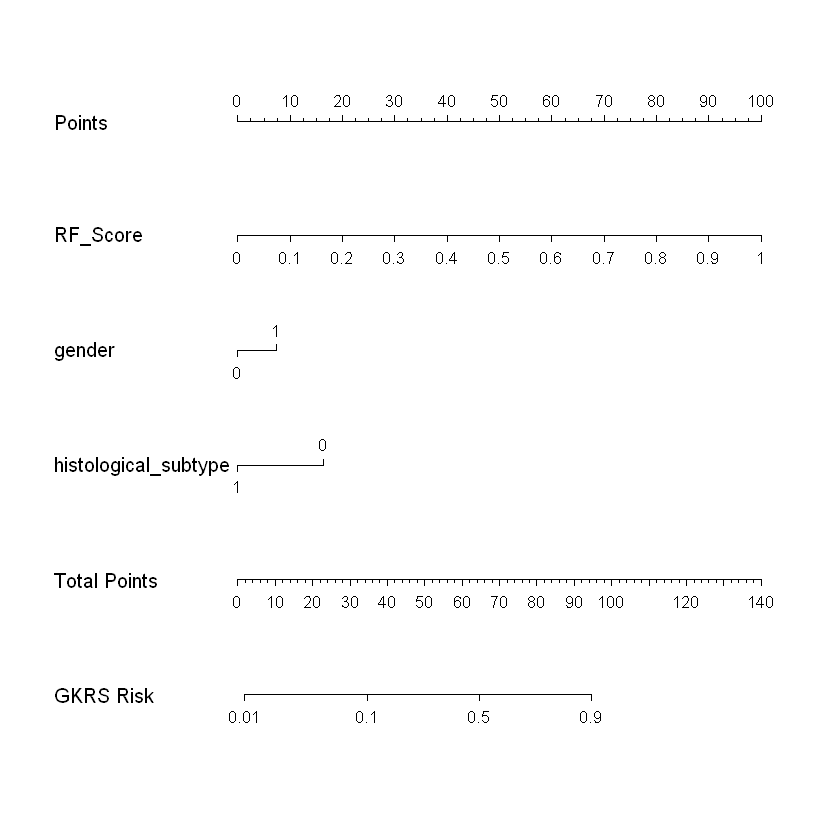

In [26]:
dd=datadist(train)
options(datadist="dd")
f1 <- lrm(Y~ RF_Score
          +gender
          +histological_subtype
          #+EGFR_mutation +targeted_drug
          ,data = train,x = TRUE,y = TRUE)

nom <- nomogram(f1, fun=plogis,fun.at=c(.001, .01, seq(.1,.9, by=.4)), lp=F, funlabel="GKRS Risk")
plot(nom)

In [29]:
f2 <- glm(Y~ RF_Score
          +gender
          +histological_subtype
          ,data = train,family = "binomial")
pre1 <- predict(f2,newdata = test)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Divergence or singularity in 40 samples

n=40   Mean absolute error=0.023   Mean squared error=0.00113
0.9 Quantile of absolute error=0.047



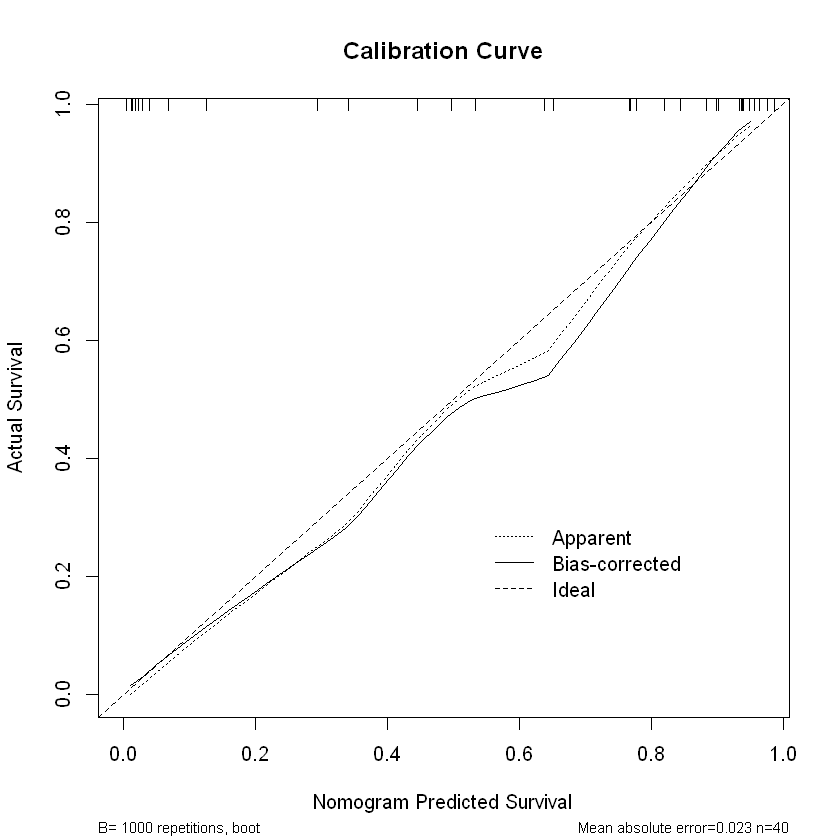

In [30]:
# Calibration Curve test
rocplot2 <- roc(test$Y,pre1)
#ci.auc(rocplot2)
f3 <- lrm(test$Y ~ pre1,x = TRUE,y = TRUE)
cal2 <- calibrate(f3,  method = "boot", B = 1000)
plot(cal2, xlab = "Nomogram Predicted Survival", ylab = "Actual Survival",main = "Calibration Curve")

Calculating net benefit curves for case-control data. All calculations are done conditional on the outcome prevalence provided.

Calculating net benefit curves for case-control data. All calculations are done conditional on the outcome prevalence provided.

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 

Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



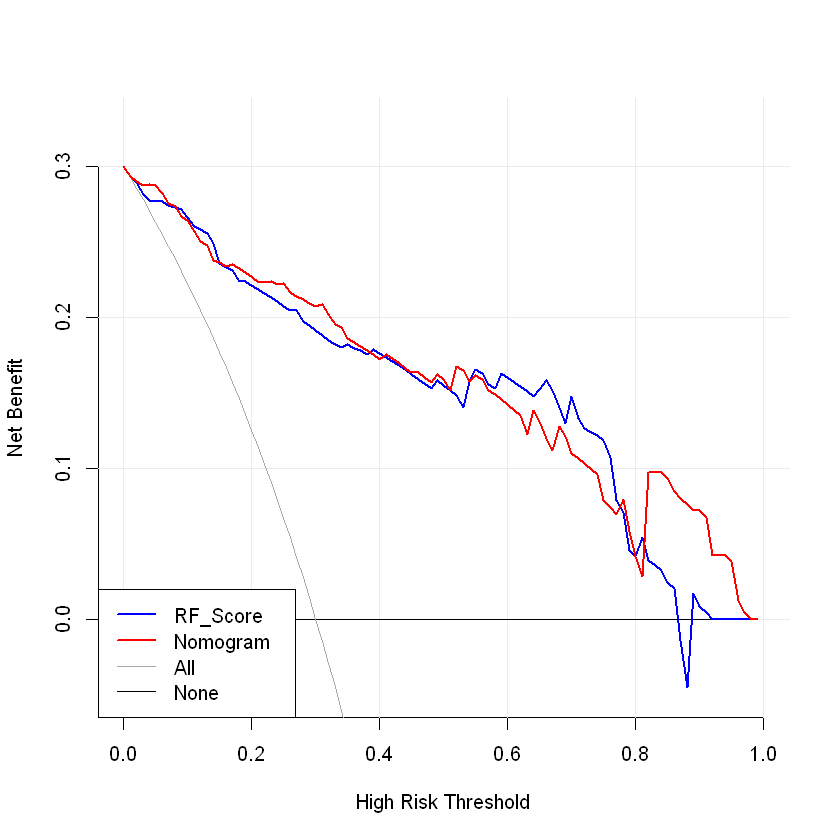

In [23]:
# Decision Curve test
RF_Score<- decision_curve(Y~ 
                          RF_Score, data = test, family = binomial(link ='logit'),
                          thresholds= seq(0,1, by = 0.01),
                          confidence.intervals =0.95,study.design = 'case-control',
                          population.prevalence = 0.3)

RF_Nomogram<- decision_curve(Y~ RF_Score
                         +gender+histological_subtype, data = test,
                         family = binomial(link ='logit'), thresholds = seq(0,1, by = 0.01),
                         confidence.intervals= 0.95,study.design = 'case-control',
                         population.prevalence= 0.3)

List<- list(RF_Score,RF_Nomogram)
plot_decision_curve(List,curve.names= c('RF_Score','Nomogram'),
                    cost.benefit.axis =FALSE,col = c('blue','red'),
                    confidence.intervals =FALSE,standardize = FALSE,
                    #legend.position = "none"
                    legend.position = "bottomleft"
                    )